## Proyecto Machine Learning BEDU. Análisis de las elecciones para Diputados MR 

In [1]:
# Estoy analizando la información con VSCode, por lo que instale los paquetes para realizar el análisis

# !pip install seaborn
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn
# !pip install numpy
# !pip install plotly

In [2]:
# Se importan las librerias correspondientes para el análisis

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Se cargan como DataFrame los archivos csv de las elecciones a diputados MR.

df_DMR_1991 = pd.read_csv(".../1991_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_1994 = pd.read_csv(".../1994_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_1997 = pd.read_csv(".../1997_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2000 = pd.read_csv(".../2000_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2003 = pd.read_csv(".../2003_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2006 = pd.read_csv(".../2006_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2009 = pd.read_csv(".../2009_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2012 = pd.read_csv(".../2012_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2015 = pd.read_csv(".../2015_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2018 = pd.read_csv(".../2018_SEE_DIP_FED_MR_NAL_CAS.csv")
df_DMR_2021 = pd.read_csv(".../2021_SEE_DIP_FED_MR_NAL_CAS.csv")

C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\1393764802.py:11: DtypeWarning: Columns (49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df_DMR_2015 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2015/2015_SEE_DIP_FED_MR_NAL_CAS.csv")
C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\1393764802.py:12: DtypeWarning: Columns (76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_DMR_2018 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/DIPUTACIONES_FED_MR_2018/2018_SEE_DIP_FED_MR_NAL_CAS.csv")
C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\1393764802.py:13: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_DMR_2021 = pd.read_csv("C:/Users/Ccris/Desktop/Respaldo/Cristian Correa Leyva/Datasets/Elecciones en Mexico/Federal/

In [4]:
# Para un análisis inicial, podemos ver las dimenciones de cada DataFrame. Esta información nos puede dar una idea del número de candidatos en cada periodo.

print(f'''Las dimensiones de los registros son los siguientes:
DRM - 1994: {df_DMR_1994.shape[0]} filas y {df_DMR_1994.shape[1]} columnas,
DRM - 1997: {df_DMR_1997.shape[0]} filas y {df_DMR_1997.shape[1]} columnas,
DRM - 2000: {df_DMR_2000.shape[0]} filas y {df_DMR_2000.shape[1]} columnas,
DRM - 2003: {df_DMR_2003.shape[0]} filas y {df_DMR_2003.shape[1]} columnas,
DRM - 2006: {df_DMR_2006.shape[0]} filas y {df_DMR_2006.shape[1]} columnas,
DRM - 2009: {df_DMR_2009.shape[0]} filas y {df_DMR_2009.shape[1]} columnas,
DRM - 2012: {df_DMR_2012.shape[0]} filas y {df_DMR_2012.shape[1]} columnas,
DRM - 2015: {df_DMR_2015.shape[0]} filas y {df_DMR_2015.shape[1]} columnas,
DRM - 2018: {df_DMR_2018.shape[0]} filas y {df_DMR_2018.shape[1]} columnas,
DRM - 2021: {df_DMR_2021.shape[0]} filas y {df_DMR_2021.shape[1]} columnas''')

Las dimensiones de los registros son los siguientes:
DRM - 1994: 95728 filas y 22 columnas,
DRM - 1997: 104716 filas y 21 columnas,
DRM - 2000: 113423 filas y 19 columnas,
DRM - 2003: 120603 filas y 25 columnas,
DRM - 2006: 130488 filas y 20 columnas,
DRM - 2009: 139181 filas y 26 columnas,
DRM - 2012: 143132 filas y 29 columnas,
DRM - 2015: 148833 filas y 52 columnas,
DRM - 2018: 156808 filas y 80 columnas,
DRM - 2021: 162793 filas y 40 columnas


In [5]:
# Ahora agregaremos una columna con el periodo correspondiente en cada DataFrame

df_DMR_1994['year'] = 1994
df_DMR_1997['year'] = 1997
df_DMR_2000['year'] = 2000
df_DMR_2003['year'] = 2003
df_DMR_2006['year'] = 2006
df_DMR_2009['year'] = 2009
df_DMR_2012['year'] = 2012
df_DMR_2015['year'] = 2015
df_DMR_2018['year'] = 2018
df_DMR_2021['year'] = 2021

# Los datos de los DataFrame estan bastante limpios, podemos confirmar que no tenemos valores nulos en las columnas más relevantes
# analizando cada uno de ellos. Aqui agrego un ejemplo para corrobar que no tenemos valores nulos.
df_DMR_1991.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86710 entries, 0 to 86709
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CIRCUNSCRIPCION     86710 non-null  int64 
 1   ID_ESTADO           86710 non-null  int64 
 2   NOMBRE_ESTADO       86710 non-null  object
 3   ID_DISTRITO         86710 non-null  int64 
 4   CABECERA_DISTRITAL  86710 non-null  object
 5   ID_MUNICIPIO        86710 non-null  int64 
 6   MUNICIPIO           86710 non-null  object
 7   SECCION             86710 non-null  int64 
 8   CASILLA             86710 non-null  object
 9   PAN                 86710 non-null  int64 
 10  PRI                 86710 non-null  int64 
 11  PPS                 86710 non-null  int64 
 12  PRD                 86710 non-null  int64 
 13  PFCRN               86710 non-null  int64 
 14  PARM                86710 non-null  int64 
 15  PDM                 86710 non-null  int64 
 16  PRT                 86

In [6]:
# En los datos de 2021 la columna "ID_DISTRITO" fue cambiada por "ID_DISTRITO_FEDERAL", por lo que, para evitar problemas en análisis posteriores
# vamos a renombrar dicha columna

df_DMR_2021.head()

,CIRCUNSCRIPCION,ID_ESTADO,NOMBRE_ESTADO,ID_DISTRITO_FEDERAL,CABECERA_DISTRITAL_FEDERAL,ID_MUNICIPIO,MUNICIPIO,SECCION,TIPO_CASILLA,ID_CASILLA,...,CAND_IND2,CAND_IND3,NUM_VOTOS_CAN_NREG,NUM_VOTOS_NULOS,TOTAL_VOTOS,LISTA_NOMINAL,ESTATUS_ACTA,TRIBUNAL,JUICIO,year
0,2,1,AGUASCALIENTES,1,JESUS MARIA,0,NaN,0,P,1,...,NaN,NaN,0,0,1,1,Cotejo,NaN,NaN,2021
1,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,B,1,...,NaN,NaN,0,25,510,646,Cotejo,NaN,NaN,2021
2,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,C,1,...,NaN,NaN,0,38,519,646,Cotejo,NaN,NaN,2021
3,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,C,2,...,NaN,NaN,0,25,513,646,Cotejo,NaN,NaN,2021
4,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,C,3,...,NaN,NaN,0,27,495,646,Cotejo,NaN,NaN,2021


In [7]:
df_DMR_2021.rename(columns = {'ID_DISTRITO_FEDERAL': 'ID_DISTRITO'}, inplace = True)
df_DMR_2021.head()

,CIRCUNSCRIPCION,ID_ESTADO,NOMBRE_ESTADO,ID_DISTRITO,CABECERA_DISTRITAL_FEDERAL,ID_MUNICIPIO,MUNICIPIO,SECCION,TIPO_CASILLA,ID_CASILLA,...,CAND_IND2,CAND_IND3,NUM_VOTOS_CAN_NREG,NUM_VOTOS_NULOS,TOTAL_VOTOS,LISTA_NOMINAL,ESTATUS_ACTA,TRIBUNAL,JUICIO,year
0,2,1,AGUASCALIENTES,1,JESUS MARIA,0,NaN,0,P,1,...,NaN,NaN,0,0,1,1,Cotejo,NaN,NaN,2021
1,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,B,1,...,NaN,NaN,0,25,510,646,Cotejo,NaN,NaN,2021
2,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,C,1,...,NaN,NaN,0,38,519,646,Cotejo,NaN,NaN,2021
3,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,C,2,...,NaN,NaN,0,25,513,646,Cotejo,NaN,NaN,2021
4,2,1,AGUASCALIENTES,1,JESUS MARIA,4,COSIO,387,C,3,...,NaN,NaN,0,27,495,646,Cotejo,NaN,NaN,2021


In [8]:
# Ahora concatenamos los DataFrame en funcion de las columnas en común. Los datos de las columnas que no 
# participan en cierto periodo tienen valores NaN
df_DMR = pd.concat([df_DMR_1994, df_DMR_1997, df_DMR_2000, df_DMR_2003, df_DMR_2006,
                df_DMR_2009, df_DMR_2012, df_DMR_2015, df_DMR_2018, df_DMR_2021]).reset_index(drop =True)

# Analizamos las dimensiones del DataFrame
df_DMR.shape

(1315705, 121)

In [9]:
# Los atributos del DataFrame son los siguientes:
df_DMR.columns

Index(['CIRCUNSCRIPCION', 'ID_ESTADO', 'NOMBRE_ESTADO', 'ID_DISTRITO',
       'CABECERA_DISTRITAL', 'ID_MUNICIPIO', 'MUNICIPIO', 'SECCION', 'CASILLA',
       'PAN',
       ...
       'CABECERA_DISTRITAL_FEDERAL', 'PES', 'RSP', 'FXM', 'PAN_PRI_PRD',
       'PAN_PRI', 'PRI_PRD', 'PVEM_PT_MORENA', 'PVEM_PT', 'PVEM_MORENA'],
      dtype='object', length=121)

In [10]:
# Para visualizar la información en forma de lista podemos emplear un 'for'
[print(columna) for columna in df_DMR.columns]

CIRCUNSCRIPCION
ID_ESTADO
NOMBRE_ESTADO
ID_DISTRITO
CABECERA_DISTRITAL
ID_MUNICIPIO
MUNICIPIO
SECCION
CASILLA
PAN
PRI
PPS
PRD
PFCRN
PARM
UNO_PDM
PT
PVEM
NUM_VOTOS_CAN_NREG
NUM_VOTOS_NULOS
TOTAL_VOTOS
ESTATUS_ACTA
year
PC
PDM
AC
AM
PCD
DSPPN
CONV
PSN
PAS
MP
PLM
FC
APT
APM
PBT
NVA_ALIANZA
ASDC
LISTA_NOMINAL
RUTA_ACTA
PSD
PRIMERO_MEXICO
SALVEMOS_MEXICO
TEPJF
MC
PRI_PVEM
PRD_PT_MC
PRD_PT
PRD_MC
PT_MC
OBSERVACIONES
MORENA
PH
ES
PAN_NVA_ALIANZA
CAND_IND1
CAND_IND2
CAND_IND3
CAND_IND4
CAND_IND5
CAND_IND6
CAND_IND7
CAND_IND8
CAND_IND9
CAND_IND10
CAND_IND11
CAND_IND12
CAND_IND13
CAND_IND14
CAND_IND15
CAND_IND16
CAND_IND17
CAND_IND18
CAND_IND19
CAND_IND20
CAND_IND21
CAND_IND22
TIPO_CASILLA
ID_CASILLA
EXT_CONTIGUA
NA
PAN_PRD_MC
PAN_PRD
PAN_MC
PRI_PVEM_NA
PRI_NA
PVEM_NA
PT_MORENA_ES
PT_MORENA
PT_ES
MORENA_ES
CAND_IND23
CAND_IND24
CAND_IND25
CAND_IND26
CAND_IND27
CAND_IND28
CAND_IND29
CAND_IND30
CAND_IND31
CAND_IND32
CAND_IND33
CAND_IND34
CAND_IND35
CAND_IND36
CAND_IND37
CAND_IND38
TRIBUNAL
JUICIO


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
# Vista previa del df
df_DMR.head()

,CIRCUNSCRIPCION,ID_ESTADO,NOMBRE_ESTADO,ID_DISTRITO,CABECERA_DISTRITAL,ID_MUNICIPIO,MUNICIPIO,SECCION,CASILLA,PAN,...,CABECERA_DISTRITAL_FEDERAL,PES,RSP,FXM,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA
0,2,1,AGUASCALIENTES,1,Aguascalientes,1,AGUASCALIENTES,1,B,206.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,AGUASCALIENTES,1,Aguascalientes,1,AGUASCALIENTES,1,C,217.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,AGUASCALIENTES,1,Aguascalientes,1,AGUASCALIENTES,2,B,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,AGUASCALIENTES,1,Aguascalientes,1,AGUASCALIENTES,2,C,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,AGUASCALIENTES,1,Aguascalientes,1,AGUASCALIENTES,3,B,185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# La mayor parte de los partidos se encuentres desde la columna 9 en adelante
columnas_partidos = df_DMR.columns[9:]

In [13]:
# Como análisis inicial podemos agrupar las columnas en función del periodo para ver los votos totales
df_DMR_year = df_DMR.groupby('year')[columnas_partidos].sum()
df_DMR_year.head()

C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\3569084785.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_DMR_year = df_DMR.groupby('year')[columnas_partidos].sum()


,PAN,PRI,PPS,PRD,PFCRN,PARM,UNO_PDM,PT,PVEM,NUM_VOTOS_CAN_NREG,...,CAND_IND38,PES,RSP,FXM,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA
year,,,,,,,,,,,,,,,,,,,,,
1994,8801957.0,17177620.0,235036.0,5717685.0,386619.0,289437.0,150811.0,907221.0,477256.0,48706.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,7772166.0,11430313.0,98460.0,7514248.0,0.0,0.0,0.0,754991.0,1114889.0,14208.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,13739305.0,0.0,0.0,0.0,272024.0,0.0,0.0,0.0,27738.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,8211395.0,6175712.0,0.0,4704854.0,0.0,0.0,0.0,641830.0,1065593.0,16384.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006,13784938.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128728.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Podemos analizar los 10 partidos que, en promedio, tienen la mayor cantidad de votos 
orden = df_DMR_year.mean().sort_values(ascending = False)
print(orden[0:10])  # Se aprecia que en el top 3, tenemos atributos no correspondientes a partidos, 
# si no a la sumatoria total, lista nominal y votos totales, por lo que podemos ignorar esos datos

top_10 = orden.index[3:13]
top_11_20 = orden.index[13:23]
top_21_30 = orden.index[23:33]


year               264311012.6
LISTA_NOMINAL       49417231.9
TOTAL_VOTOS         39960827.9
PRI                 10530829.4
PAN                  8819980.8
MORENA               4038745.0
PRD                  3918617.4
NUM_VOTOS_NULOS      1492132.8
PVEM                 1475288.3
AC                   1422828.3
dtype: float64


In [15]:
df_DMR_year[top_10] # Pudiesemos quitar los votos nulos, pero los deje porrque considero que es información interesante

,PRI,PAN,MORENA,PRD,NUM_VOTOS_NULOS,PVEM,AC,PBT,APM,MC
year,,,,,,,,,,
1994,17177620.0,8801957.0,0.0,5717685.0,1146122.0,477256.0,0.0,0.0,0.0,0.0
1997,11430313.0,7772166.0,0.0,7514248.0,854675.0,1114889.0,0.0,0.0,0.0,0.0
2000,13739305.0,0.0,0.0,0.0,864289.0,0.0,14228283.0,0.0,0.0,0.0
2003,6175712.0,8211395.0,0.0,4704854.0,898554.0,1065593.0,0.0,0.0,0.0,0.0
2006,0.0,13784938.0,0.0,0.0,1036287.0,0.0,0.0,11969449.0,11647698.0,0.0
2009,12714314.0,9688690.0,0.0,4220695.0,1869254.0,2256620.0,0.0,0.0,0.0,0.0
2012,14877736.0,12895515.0,0.0,8202920.0,2472613.0,2020768.0,0.0,0.0,0.0,1286139.0
2015,11436677.0,8351120.0,3326038.0,4291902.0,1889613.0,2579327.0,0.0,0.0,0.0,2420791.0
2018,9202896.0,9904059.0,20480882.0,2840980.0,2227598.0,2616601.0,0.0,0.0,0.0,2374376.0


In [16]:
# df_DMR_year.max().sort_values(ascending = False)

In [17]:
# Análisis general de los atributos
df_DMR_year.describe()

,PAN,PRI,PPS,PRD,PFCRN,PARM,UNO_PDM,PT,PVEM,NUM_VOTOS_CAN_NREG,...,CAND_IND38,PES,RSP,FXM,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA
count,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,10.00000,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,...,10.000000,1.000000e+01,10.000000,1.000000e+01,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,8.819981e+06,1.053083e+07,33349.600000,3.918617e+06,38661.90000,56146.100000,15081.100000,9.484043e+05,1.475288e+06,45353.500000,...,491.600000,1.345858e+05,86521.500000,1.211824e+05,21651.90000,7150.00000,2444.000000,5120.800000,2247.200000,2510.800000
std,3.691914e+06,4.891089e+06,77326.389555,2.832265e+06,122259.66267,118437.507241,47690.625621,6.257148e+05,1.074494e+06,32532.805283,...,1554.575698,4.255977e+05,273605.006574,3.832124e+05,68469.31967,22610.28527,7728.606601,16193.391442,7106.270358,7939.846749
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,14208.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.246326e+06,8.716015e+06,0.000000,1.979912e+06,0.00000,0.000000,0.000000,6.701202e+05,6.243402e+05,28959.750000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,8.795962e+06,1.143350e+07,0.000000,4.256298e+06,0.00000,0.000000,0.000000,1.011691e+06,1.567828e+06,38428.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,9.850217e+06,1.348306e+07,0.000000,5.464477e+06,0.00000,0.000000,0.000000,1.338954e+06,2.498650e+06,51049.000000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.378494e+07,1.717762e+07,235036.000000,8.202920e+06,386619.00000,289437.000000,150811.000000,1.935369e+06,2.621829e+06,128728.000000,...,4916.000000,1.345858e+06,865215.000000,1.211824e+06,216519.00000,71500.00000,24440.000000,51208.000000,22472.000000,25108.000000


In [18]:
# Se pueden borrar las columnas que no sean de interes de la siguiente forma
# df_DMR_year.drop(['TOTAL_VOTOS', 'LISTA_NOMINAL'], axis = 1, inplace = True)

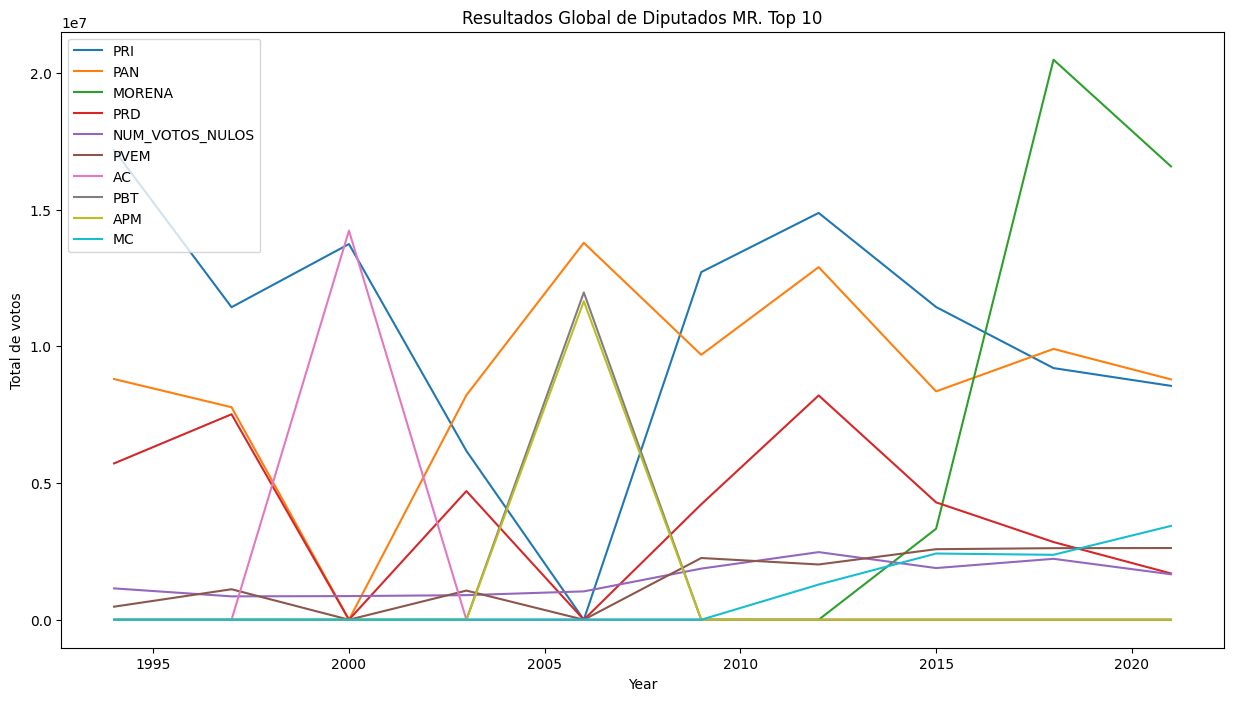

In [19]:
# Para un análisis inicial podemos visualizar el top 10 de los partidos y despues los menos relevantes

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_10:
    plt.plot(df_DMR_year.index, df_DMR_year[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Resultados Global de Diputados MR. Top 10')
plt.show()

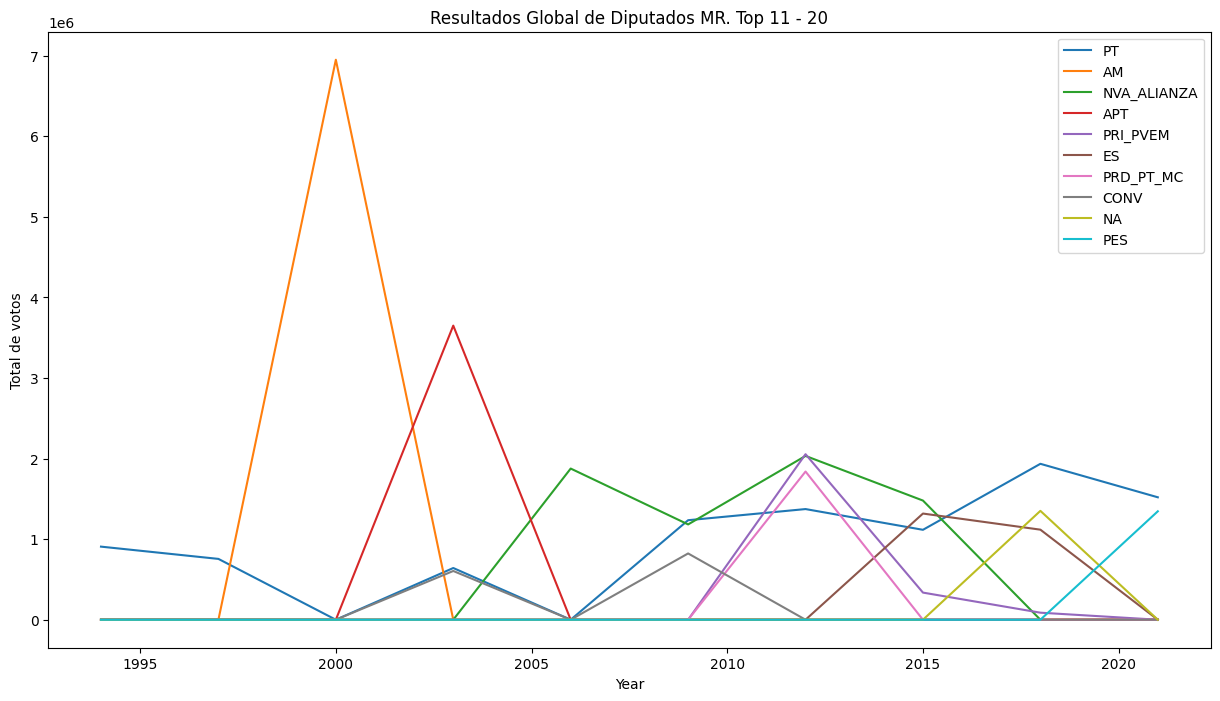

In [20]:
# Top 11 - 20

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_11_20:
    plt.plot(df_DMR_year.index, df_DMR_year[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Resultados Global de Diputados MR. Top 11 - 20')

plt.show()

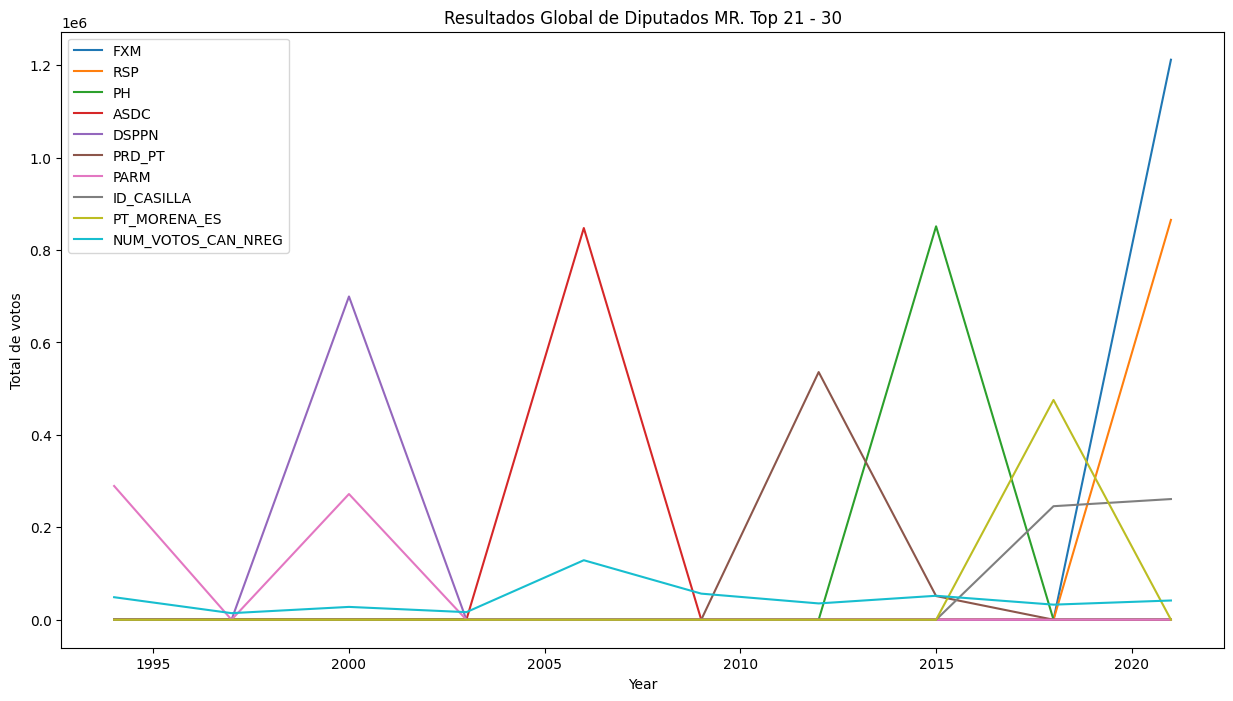

In [21]:
# Top 21 - 30. Algo interesante que se aprecia en la gráfica es que muchos partidos en esta categoría solo participaron durante un periodo.

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_21_30:
    plt.plot(df_DMR_year.index, df_DMR_year[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Resultados Global de Diputados MR. Top 21 - 30')
plt.show()

In [22]:
# Ahora estaremos analizando los resultados estatales en Jalisco. Para ello agrupados los datos en funcion del periodo y de los estados

# Agrupando la información por estado:
df_DMR_year_estado = df_DMR.groupby(['year','NOMBRE_ESTADO'])[columnas_partidos].sum()
df_DMR_year_estado.drop('year', axis = 1, inplace = True)
df_DMR_year_estado = df_DMR_year_estado.reset_index()
df_DMR_year_estado.head()

C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\652226403.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_DMR_year_estado = df_DMR.groupby(['year','NOMBRE_ESTADO'])[columnas_partidos].sum()


,year,NOMBRE_ESTADO,PAN,PRI,PPS,PRD,PFCRN,PARM,UNO_PDM,PT,...,CAND_IND38,PES,RSP,FXM,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA
0,1994,AGUASCALIENTES,118395.0,158184.0,1913.0,28811.0,7899.0,1776.0,1507.0,6026.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,BAJA CALIFORNIA,289093.0,398932.0,4658.0,61692.0,4622.0,2804.0,2234.0,13330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994,BAJA CALIFORNIA SUR,46324.0,79548.0,447.0,7448.0,730.0,578.0,468.0,2556.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994,CAMPECHE,35898.0,122544.0,1358.0,46498.0,1482.0,6378.0,562.0,2681.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,CHIAPAS,110075.0,503542.0,7275.0,337431.0,19746.0,7724.0,1942.0,19976.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Filtramos los datos para analizar unicamente los resultados en Jalisco
df_DMR_jalisco = df_DMR_year_estado[df_DMR_year_estado['NOMBRE_ESTADO'] == 'JALISCO']
df_DMR_jalisco.head()

,year,NOMBRE_ESTADO,PAN,PRI,PPS,PRD,PFCRN,PARM,UNO_PDM,PT,...,CAND_IND38,PES,RSP,FXM,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA
13,1994,JALISCO,977607.0,1042044.0,12168.0,180521.0,21149.0,14494.0,20234.0,42326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,1997,JALISCO,937248.0,745934.0,4968.0,245086.0,0.0,0.0,0.0,26419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,2000,JALISCO,0.0,936849.0,0.0,0.0,0.0,18927.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,2003,JALISCO,899143.0,912610.0,0.0,154670.0,0.0,0.0,0.0,28932.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,2006,JALISCO,1311728.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Nuevamente ordenamos los datos en función de los votos en promedio y definimos el TOP 10
orden_jalisco = df_DMR_jalisco.mean().sort_values(ascending = False)
top_10_jalisco = orden_jalisco.index[2:12]
df_DMR_jalisco[top_10_jalisco]

C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\4105244644.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  orden_jalisco = df_DMR_jalisco.mean().sort_values(ascending = False)


,PAN,PRI,MC,MORENA,AC,PRD,PVEM,APM,NUM_VOTOS_NULOS,NVA_ALIANZA
13,977607.0,1042044.0,0.0,0.0,0.0,180521.0,26851.0,0.0,64629.0,0.0
45,937248.0,745934.0,0.0,0.0,0.0,245086.0,88489.0,0.0,56796.0,0.0
77,0.0,936849.0,0.0,0.0,1280567.0,0.0,0.0,0.0,50720.0,0.0
109,899143.0,912610.0,0.0,0.0,0.0,154670.0,194306.0,0.0,53045.0,0.0
141,1311728.0,0.0,0.0,0.0,0.0,0.0,0.0,919540.0,64611.0,147764.0
173,940741.0,972093.0,0.0,0.0,0.0,151224.0,226149.0,0.0,141654.0,72956.0
205,1026700.0,1053033.0,399558.0,0.0,0.0,216852.0,111322.0,0.0,129563.0,109858.0
237,561715.0,797581.0,852662.0,84661.0,0.0,105675.0,105422.0,0.0,89709.0,89301.0
269,539606.0,513098.0,813920.0,832433.0,0.0,49685.0,159091.0,0.0,122397.0,0.0
301,478308.0,413293.0,944571.0,691372.0,0.0,26626.0,106388.0,0.0,74881.0,0.0


In [25]:
# Como se puede apreciar en las columnas del DataFrame, en 2018 y 2021 participaron bastantes candidatos independientes,
# para condensar la información podemos agruparlos en una sola columna "CAND_IND_T"

df_DMR_jalisco['CAND_IND_T'] = 0
i = 1
for cand in df_DMR_jalisco.columns:
    if cand == f'CAND_IND{str(i)}':
        df_DMR_jalisco['CAND_IND_T'] = df_DMR_jalisco['CAND_IND_T'].add(df_DMR_jalisco[cand]) 
        df_DMR_jalisco.drop(cand, axis = 1, inplace = True)
        i += 1

# Corroboramos las nuevas dimensioens del DataFrame
df_DMR_jalisco.shape 

C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\84495834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DMR_jalisco['CAND_IND_T'] = 0
C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\84495834.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DMR_jalisco['CAND_IND_T'] = df_DMR_jalisco['CAND_IND_T'].add(df_DMR_jalisco[cand])
C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\84495834.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

(10, 68)

In [26]:
# Podemos apreciar las columnas en forma de lista para comprobar los cambios realizados al df
[print(columna) for columna in df_DMR_jalisco.columns]

year
NOMBRE_ESTADO
PAN
PRI
PPS
PRD
PFCRN
PARM
UNO_PDM
PT
PVEM
NUM_VOTOS_CAN_NREG
NUM_VOTOS_NULOS
TOTAL_VOTOS
PC
PDM
AC
AM
PCD
DSPPN
CONV
PSN
PAS
MP
PLM
FC
APT
APM
PBT
NVA_ALIANZA
ASDC
LISTA_NOMINAL
PSD
PRIMERO_MEXICO
SALVEMOS_MEXICO
MC
PRI_PVEM
PRD_PT_MC
PRD_PT
PRD_MC
PT_MC
MORENA
PH
ES
PAN_NVA_ALIANZA
ID_CASILLA
EXT_CONTIGUA
NA
PAN_PRD_MC
PAN_PRD
PAN_MC
PRI_PVEM_NA
PRI_NA
PVEM_NA
PT_MORENA_ES
PT_MORENA
PT_ES
MORENA_ES
PES
RSP
FXM
PAN_PRI_PRD
PAN_PRI
PRI_PRD
PVEM_PT_MORENA
PVEM_PT
PVEM_MORENA
CAND_IND_T


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
# Podemos apreciar que los candidatos independientes participaron en 2018 y 2021, en 2018 los votos totales de los candidatos independientes 
# tuvieron mayor significancia.
df_DMR_jalisco[['year', 'CAND_IND_T']]

,year,CAND_IND_T
13,1994,0.0
45,1997,0.0
77,2000,0.0
109,2003,0.0
141,2006,0.0
173,2009,0.0
205,2012,0.0
237,2015,0.0
269,2018,146701.0
301,2021,4097.0


In [28]:
# Este análisis es del tratamiento a los datos de los partidos de forma global

# df_DMR_year['CAND_IND_T'] = 0
# i = 1
# for cand in df_DMR_year.columns:
#     if cand == f'CAND_IND{str(i)}':
#         df_DMR_year['CAND_IND_T'] = df_DMR_year['CAND_IND_T'].add(df_DMR_year[cand]) 
#         df_DMR_year.drop(cand, axis = 1, inplace = True)
#         i += 1
# df_DMR_year.shape 

In [29]:
# df_DMR_year['CAND_IND_T']

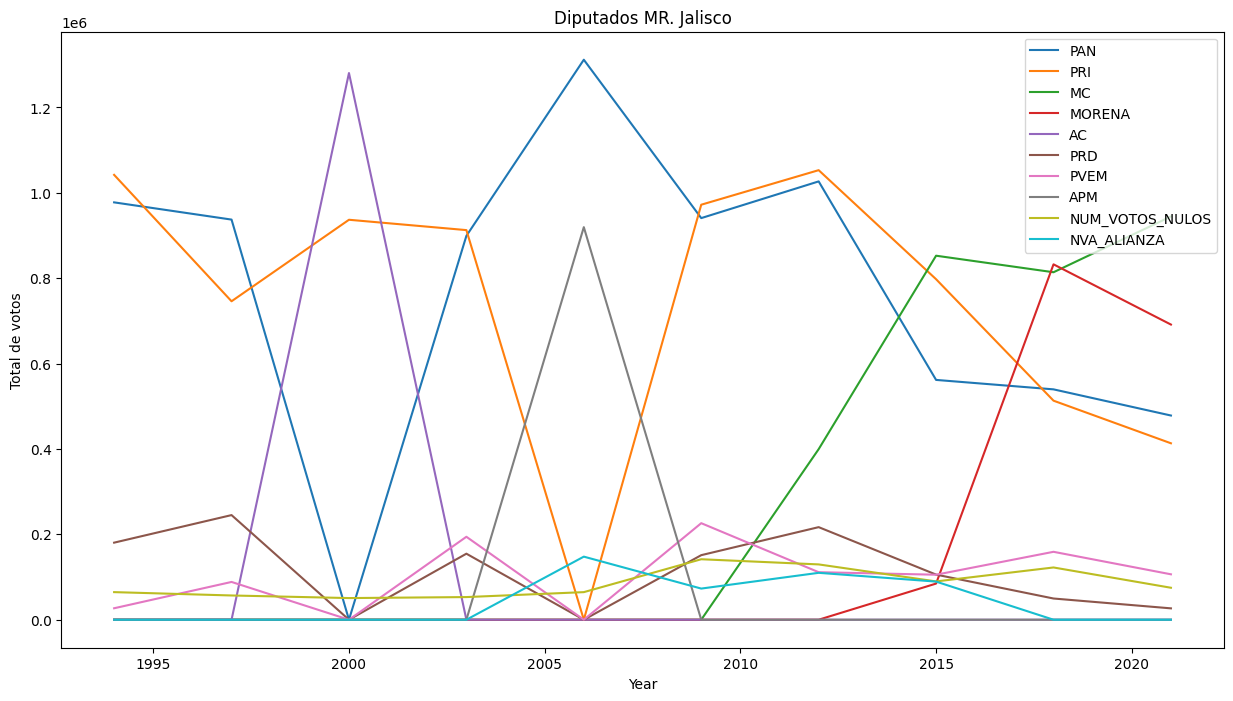

In [30]:
# Graficamos el top 10 de las elecciones de diputados MR en Jalisco

leyendas = []
plt.figure(figsize = (15, 8))
for columna in top_10_jalisco:
    plt.plot(df_DMR_jalisco['year'], df_DMR_jalisco[columna])
    leyendas.append(columna)
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.legend(leyendas)
plt.title('Diputados MR. Jalisco')
plt.show()

In [31]:
# Tambien podemos agrupar la información de Jalisco en función de los distritos 

df_distrito_jalisco = df_DMR[df_DMR['NOMBRE_ESTADO'] == 'JALISCO'].groupby(['year','ID_DISTRITO']).sum().reset_index()
df_distrito_jalisco.head()

C:\Users\Ccris\AppData\Local\Temp\ipykernel_16012\3390765139.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_distrito_jalisco = df_DMR[df_DMR['NOMBRE_ESTADO'] == 'JALISCO'].groupby(['year','ID_DISTRITO']).sum().reset_index()


,year,ID_DISTRITO,CIRCUNSCRIPCION,ID_ESTADO,ID_MUNICIPIO,SECCION,PAN,PRI,PPS,PRD,...,CAND_IND38,PES,RSP,FXM,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA
0,1994,1,376,1316,3666,56550,20705.0,16352.0,128.0,1895.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,2,940,3290,9165,163276,49422.0,40490.0,507.0,7652.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994,3,1448,5068,14118,306433,80193.0,65147.0,891.0,11627.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994,4,480,1680,4680,116307,23998.0,21635.0,203.0,3645.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,5,1004,3514,16651,453691,32285.0,46424.0,470.0,4103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_distrito_jalisco.corr()

,year,ID_DISTRITO,CIRCUNSCRIPCION,ID_ESTADO,ID_MUNICIPIO,SECCION,PAN,PRI,PPS,PRD,...,CAND_IND38,PES,RSP,FXM,PAN_PRI_PRD,PAN_PRI,PRI_PRD,PVEM_PT_MORENA,PVEM_PT,PVEM_MORENA
year,1.000000,0.011055,-0.255410,0.763311,0.434387,0.437396,-0.188200,-0.318715,-0.574606,-0.287538,...,NaN,0.504255,0.389280,0.472834,0.438329,0.480799,0.486190,0.446818,0.465222,0.413217
ID_DISTRITO,0.011055,1.000000,0.143083,0.152451,-0.045952,-0.052278,-0.026568,0.075792,0.089484,0.208476,...,NaN,0.044477,0.055173,0.064335,0.012063,-0.014242,0.054299,0.046851,0.062568,0.007467
CIRCUNSCRIPCION,-0.255410,0.143083,1.000000,0.004972,0.029289,0.034031,0.288541,0.373116,0.809905,0.257940,...,NaN,0.002662,0.004318,0.009319,0.012948,0.008361,0.011111,-0.000971,-0.004078,0.003068
ID_ESTADO,0.763311,0.152451,0.004972,1.000000,0.517620,0.520245,0.073705,-0.027453,-0.360620,-0.007290,...,NaN,0.322168,0.255272,0.321884,0.310893,0.324072,0.335411,0.275813,0.278275,0.266573
ID_MUNICIPIO,0.434387,-0.045952,0.029289,0.517620,1.000000,0.987906,0.058906,-0.018860,-0.151756,-0.047621,...,NaN,0.172019,0.108723,0.139278,0.216452,0.199635,0.135699,0.182607,0.134769,0.156866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAN_PRI,0.480799,-0.014242,0.008361,0.324072,0.199635,0.200390,-0.177180,-0.282886,-0.122384,-0.241144,...,NaN,0.852378,0.617046,0.837000,0.915941,1.000000,0.866969,0.762467,0.745610,0.674536
PRI_PRD,0.486190,0.054299,0.011111,0.335411,0.135699,0.139684,-0.221582,-0.270457,-0.123756,-0.227413,...,NaN,0.906943,0.712805,0.905327,0.763791,0.866969,1.000000,0.803007,0.862236,0.699832
PVEM_PT_MORENA,0.446818,0.046851,-0.000971,0.275813,0.182607,0.205148,-0.236698,-0.283019,-0.113735,-0.210337,...,NaN,0.799464,0.630335,0.753091,0.808195,0.762467,0.803007,1.000000,0.880684,0.716610
PVEM_PT,0.465222,0.062568,-0.004078,0.278275,0.134769,0.141751,-0.269179,-0.288121,-0.118419,-0.219387,...,NaN,0.849401,0.687949,0.807110,0.742778,0.745610,0.862236,0.880684,1.000000,0.859106


In [33]:
[print(columna) for columna in df_distrito_jalisco.columns]

year
ID_DISTRITO
CIRCUNSCRIPCION
ID_ESTADO
ID_MUNICIPIO
SECCION
PAN
PRI
PPS
PRD
PFCRN
PARM
UNO_PDM
PT
PVEM
NUM_VOTOS_CAN_NREG
NUM_VOTOS_NULOS
TOTAL_VOTOS
PC
PDM
AC
AM
PCD
DSPPN
CONV
PSN
PAS
MP
PLM
FC
APT
APM
PBT
NVA_ALIANZA
ASDC
LISTA_NOMINAL
PSD
PRIMERO_MEXICO
SALVEMOS_MEXICO
MC
PRI_PVEM
PRD_PT_MC
PRD_PT
PRD_MC
PT_MC
MORENA
PH
ES
PAN_NVA_ALIANZA
CAND_IND1
CAND_IND2
CAND_IND3
CAND_IND4
CAND_IND5
CAND_IND6
CAND_IND7
CAND_IND8
CAND_IND9
CAND_IND10
CAND_IND11
CAND_IND12
CAND_IND13
CAND_IND14
CAND_IND15
CAND_IND16
CAND_IND17
CAND_IND18
CAND_IND19
CAND_IND20
CAND_IND21
CAND_IND22
ID_CASILLA
EXT_CONTIGUA
NA
PAN_PRD_MC
PAN_PRD
PAN_MC
PRI_PVEM_NA
PRI_NA
PVEM_NA
PT_MORENA_ES
PT_MORENA
PT_ES
MORENA_ES
CAND_IND23
CAND_IND24
CAND_IND25
CAND_IND26
CAND_IND27
CAND_IND28
CAND_IND29
CAND_IND30
CAND_IND31
CAND_IND32
CAND_IND33
CAND_IND34
CAND_IND35
CAND_IND36
CAND_IND37
CAND_IND38
PES
RSP
FXM
PAN_PRI_PRD
PAN_PRI
PRI_PRD
PVEM_PT_MORENA
PVEM_PT
PVEM_MORENA


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [34]:
# Se hara una tabla pivote para analizar el número de votos por distrito a lo largo de los periodos

piv_distrito_jalisco = pd.pivot_table(df_distrito_jalisco, values = 'TOTAL_VOTOS', index = 'year', columns = 'ID_DISTRITO', aggfunc = 'sum')
piv_distrito_jalisco

ID_DISTRITO,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
year,,,,,,,,,,,,,,,,,,,,
1994,41595.0,107088.0,170386.0,53194.0,89463.0,109956.0,126869.0,124177.0,112636.0,110667.0,79227.0,105247.0,46684.0,76020.0,173211.0,148642.0,158318.0,251593.0,91476.0,228910.0
1997,88552.0,106455.0,109609.0,116335.0,94022.0,108491.0,121739.0,121939.0,114269.0,104329.0,117615.0,123106.0,119614.0,119686.0,114032.0,132921.0,119716.0,100284.0,115619.0,NaN
2000,101908.0,131880.0,131490.0,147187.0,117442.0,141914.0,161777.0,145730.0,129553.0,139496.0,134517.0,144963.0,137419.0,134871.0,135876.0,164116.0,143910.0,120835.0,133394.0,NaN
2003,110040.0,122082.0,127077.0,123858.0,116845.0,119646.0,143804.0,119067.0,106951.0,111040.0,111062.0,116247.0,111084.0,107793.0,130952.0,137132.0,144740.0,127248.0,133200.0,NaN
2006,139476.0,136858.0,147114.0,147933.0,136358.0,164733.0,125849.0,180911.0,156894.0,155519.0,152847.0,154807.0,170507.0,164919.0,142827.0,147163.0,148150.0,147644.0,152413.0,NaN
2009,154795.0,140487.0,146429.0,125056.0,147160.0,139074.0,118228.0,141421.0,127938.0,123784.0,125477.0,163812.0,136151.0,128935.0,145263.0,127687.0,160504.0,158145.0,153083.0,NaN
2012,171904.0,165159.0,171154.0,177744.0,181550.0,204416.0,164106.0,174074.0,162027.0,183295.0,160617.0,259216.0,172765.0,169552.0,166097.0,179388.0,180335.0,182481.0,175212.0,NaN
2015,171589.0,151891.0,156533.0,137249.0,168827.0,164912.0,121566.0,140373.0,130098.0,140048.0,127732.0,227763.0,137796.0,131911.0,151288.0,133276.0,177907.0,168040.0,168285.0,NaN
2018,172265.0,153426.0,185985.0,162186.0,156110.0,179321.0,135778.0,218218.0,175891.0,181869.0,189931.0,174693.0,169745.0,196797.0,178429.0,162344.0,159317.0,178328.0,187800.0,146107.0


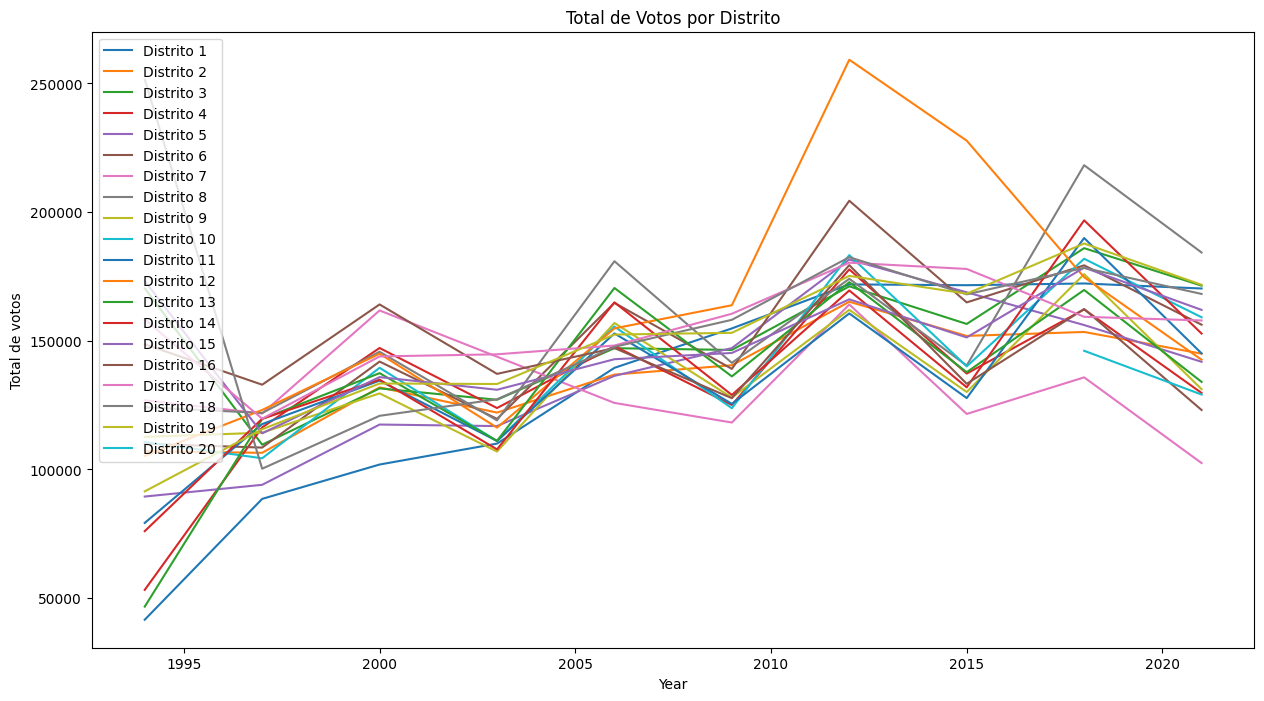

In [35]:
# La idea es graficar los votos recopilados en los diferentes distritos en los diferentes periodos. 

leyendas = []
plt.figure(figsize = (15, 8))
for columna in piv_distrito_jalisco.columns:
    plt.plot(piv_distrito_jalisco.index, piv_distrito_jalisco[columna])
    leyendas.append(f'Distrito {str(int(columna))}')
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.title('Total de Votos por Distrito')
plt.legend(leyendas)
plt.show()

In [36]:
# En la gráfica antererior podemos apreciar que el total de votos han aumentado en fucnion del tiempo en cada uno de los Distritos
# Para analizar más profundamente a cada Distrito podriamos analizar la distritubución de los votos en cada unos de los partidos en los diferentes Distritos
# Haremos multiples tablas pivot de los partido

name_piv_distrito_jalisco_partidos = []
for partido in list(top_10_jalisco):
     name_piv_distrito_jalisco_partidos.append(f'pivot_{partido}')
print(name_piv_distrito_jalisco_partidos)

# NOTA. planeaba elaborar varias tablas pivot individuales, pero al final opte por hacer diccionarios, lo cual esta mejor, por lo que no necesote
# la variable "name_piv_distrito_jalisco_partidos"

['pivot_PAN', 'pivot_PRI', 'pivot_MC', 'pivot_MORENA', 'pivot_AC', 'pivot_PRD', 'pivot_PVEM', 'pivot_APM', 'pivot_NUM_VOTOS_NULOS', 'pivot_NVA_ALIANZA']


In [37]:
# Ahora que establecimos los nombres de las tablas pivot, vamos a ingresar los datos de cada una

tablas_pivote_jalisco_distrito = {}
for i, nombre_tabla_pivot in enumerate(top_10_jalisco):
    tablas_pivote_jalisco_distrito[nombre_tabla_pivot] = pd.pivot_table(df_distrito_jalisco, values = list(top_10_jalisco)[i], index = 'year', columns = 'ID_DISTRITO', aggfunc = 'sum')
tablas_pivote_jalisco_distrito.keys()

dict_keys(['PAN', 'PRI', 'MC', 'MORENA', 'AC', 'PRD', 'PVEM', 'APM', 'NUM_VOTOS_NULOS', 'NVA_ALIANZA'])

In [38]:
# Se puede analizar el pivot de cada partido en el diccionario
tablas_pivote_jalisco_distrito['PRD'].head()

ID_DISTRITO,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
year,,,,,,,,,,,,,,,,,,,,
1994,1895.0,7652.0,11627.0,3645.0,4103.0,1926.0,1821.0,13337.0,7367.0,8869.0,10299.0,6678.0,2713.0,4094.0,28219.0,8891.0,11536.0,16044.0,15219.0,14586.0
1997,14844.0,7195.0,4747.0,16535.0,6598.0,10653.0,14577.0,12641.0,13367.0,9202.0,11864.0,11470.0,11606.0,14373.0,17321.0,12640.0,14858.0,20890.0,19705.0,NaN
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2003,12535.0,4755.0,4909.0,7643.0,11184.0,4954.0,7861.0,5152.0,4681.0,4572.0,5537.0,5643.0,4821.0,5161.0,13732.0,7775.0,15726.0,16328.0,11701.0,NaN
2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


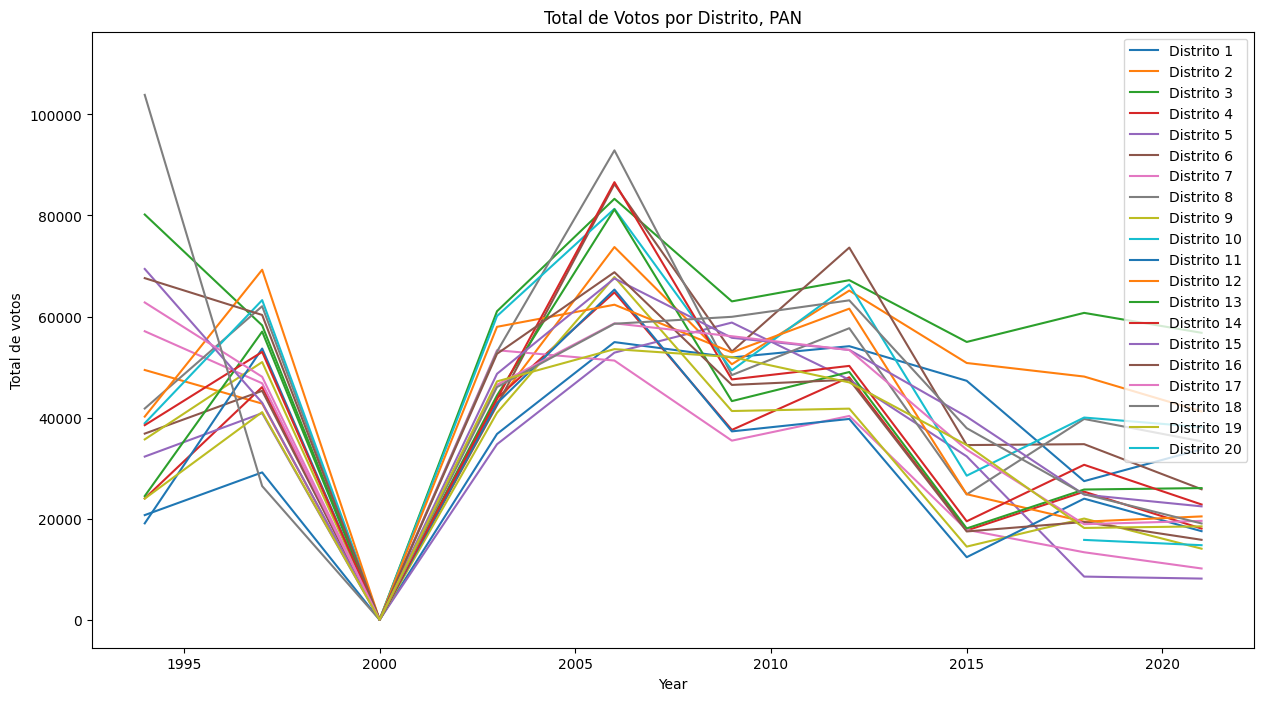

In [39]:
# Ahora podemos graficar los votos obtenidos para cada partido en cada distrito, podemos empezar con el PAN

leyendas = []
plt.figure(figsize = (15, 8))
for columna in tablas_pivote_jalisco_distrito['PAN'].columns:
    plt.plot(tablas_pivote_jalisco_distrito['PAN'].index, tablas_pivote_jalisco_distrito['PAN'][columna])
    leyendas.append(f'Distrito {str(int(columna))}')
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.title('Total de Votos por Distrito, PAN')
plt.legend(leyendas)
plt.show()


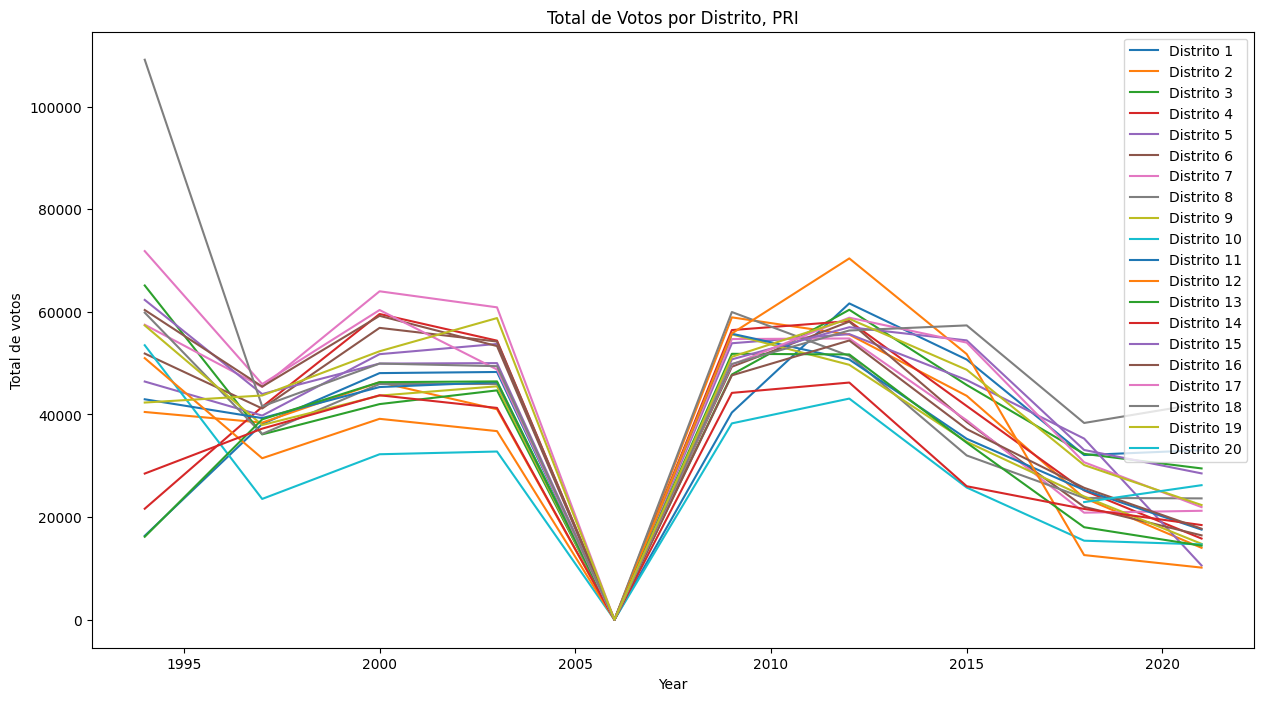

In [40]:
# Ahora podemos graficar los votos obtenidos para cada partido en cada distrito, podemos empezar con el PAN

leyendas = []
plt.figure(figsize = (15, 8))
for columna in tablas_pivote_jalisco_distrito['PRI'].columns:
    plt.plot(tablas_pivote_jalisco_distrito['PRI'].index, tablas_pivote_jalisco_distrito['PRI'][columna])
    leyendas.append(f'Distrito {str(int(columna))}')
plt.xlabel('Year')
plt.ylabel('Total de votos')
plt.title('Total de Votos por Distrito, PRI')
plt.legend(leyendas)
plt.show()

In [41]:
# Para analizar el impacto de los votos obtenidos en cada partido, podemos normalizar la información en función de los votos totales
# de cada distrito con la tabla pivot "piv_distrito_jalisco". 

tablas_pivote_jalisco_distrito_norm = {}
for partido in top_10_jalisco:
    tablas_pivote_jalisco_distrito_norm[partido] = tablas_pivote_jalisco_distrito[partido] / piv_distrito_jalisco
tablas_pivote_jalisco_distrito_norm['PRI']

ID_DISTRITO,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
year,,,,,,,,,,,,,,,,,,,,
1994,0.393124,0.378100,0.382349,0.406719,0.518918,0.471843,0.453176,0.481989,0.509242,0.483405,0.542302,0.484422,0.346436,0.374743,0.359867,0.406110,0.453821,0.433828,0.462744,0.381276
1997,0.430798,0.360894,0.329581,0.356746,0.423167,0.379497,0.372683,0.296952,0.332111,0.225652,0.334107,0.255650,0.326484,0.311156,0.385743,0.341857,0.383666,0.414682,0.378000,NaN
2000,0.471671,0.351062,0.319621,0.404873,0.440711,0.400834,0.395693,0.315289,0.337152,0.231197,0.337140,0.270117,0.336926,0.324369,0.367423,0.360915,0.419464,0.413208,0.392259,NaN
2003,0.438813,0.336028,0.351747,0.439164,0.460037,0.453179,0.423403,0.385909,0.425372,0.295236,0.416776,0.316215,0.418161,0.382965,0.381934,0.388954,0.336970,0.388375,0.441404,NaN
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2009,0.260874,0.419477,0.326383,0.451422,0.366180,0.354559,0.462725,0.424053,0.434781,0.309151,0.444257,0.340622,0.380658,0.342917,0.349332,0.373014,0.309762,0.315192,0.334766,NaN
2012,0.358630,0.336482,0.352957,0.327460,0.306599,0.284224,0.334046,0.295403,0.306640,0.235140,0.315788,0.271673,0.299291,0.272636,0.343233,0.303387,0.326448,0.308931,0.334760,NaN
2015,0.295538,0.287298,0.292296,0.303485,0.276680,0.233676,0.319736,0.228071,0.266584,0.183965,0.276133,0.227311,0.250327,0.197231,0.359863,0.278760,0.303608,0.341377,0.289503,NaN
2018,0.186323,0.154693,0.173820,0.155334,0.226161,0.122668,0.153648,0.108795,0.136596,0.084698,0.133148,0.072127,0.106200,0.109707,0.185429,0.158361,0.192647,0.215036,0.160511,0.156912


In [42]:
# Eliminando el periodo donde no hubo participación, podemos obtener la descripción de los datos en cada distrito. Lo que me gustaria denotar
# es impacto menor y mayor en los distritos para el partido, en este caso, el "PRI"
tablas_pivote_jalisco_distrito_norm['PRI'].drop(2006).describe()

ID_DISTRITO,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000
mean,0.336645,0.302299,0.300086,0.329684,0.343670,0.311747,0.346922,0.296086,0.317914,0.237858,0.324521,0.256595,0.285796,0.270722,0.323207,0.306165,0.318376,0.342365,0.324899,0.247098
std,0.106989,0.107178,0.076305,0.119042,0.138103,0.134741,0.106875,0.126108,0.132342,0.120636,0.137375,0.128541,0.111740,0.104259,0.081951,0.096465,0.100941,0.076821,0.115289,0.118475
min,0.186323,0.096653,0.172017,0.121953,0.074574,0.105242,0.153648,0.108795,0.112746,0.084698,0.121038,0.071217,0.106200,0.109707,0.176038,0.144127,0.139000,0.215036,0.130145,0.156912
25%,0.260874,0.287298,0.292296,0.303485,0.276680,0.233676,0.319736,0.228071,0.266584,0.183965,0.276133,0.227311,0.250327,0.197231,0.343233,0.278760,0.303608,0.308931,0.289503,0.180009
50%,0.358630,0.336482,0.326383,0.356746,0.366180,0.354559,0.372683,0.296952,0.332111,0.231197,0.334107,0.270117,0.326484,0.311156,0.359863,0.341857,0.326448,0.341377,0.334766,0.203106
75%,0.430798,0.360894,0.351747,0.406719,0.440711,0.400834,0.423403,0.385909,0.425372,0.295236,0.416776,0.316215,0.346436,0.342917,0.367423,0.373014,0.383666,0.413208,0.392259,0.292191
max,0.471671,0.419477,0.382349,0.451422,0.518918,0.471843,0.462725,0.481989,0.509242,0.483405,0.542302,0.484422,0.418161,0.382965,0.385743,0.406110,0.453821,0.433828,0.462744,0.381276


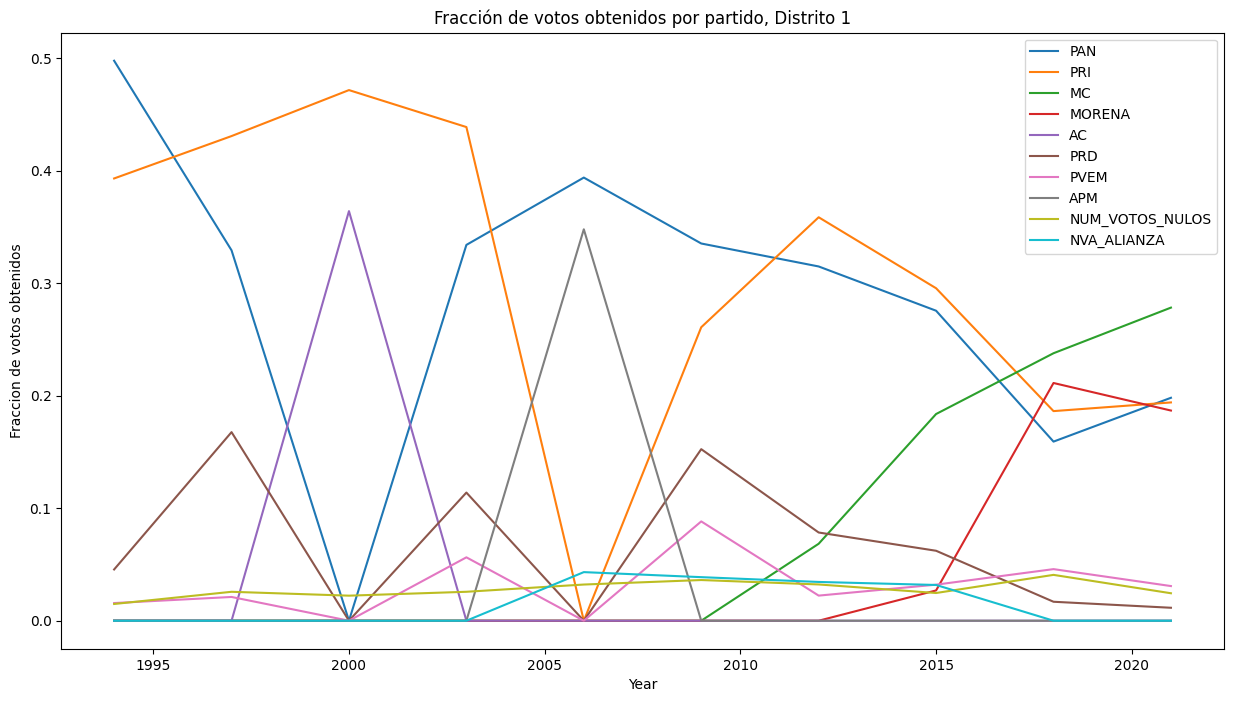

In [43]:
# Ahora podemos gráficar el impacto de cada partido en los diferentes distritos y en los diferentes periodos

leyendas = []
distrito = 1     # Distrito a analizar
plt.figure(figsize = (15, 8))
for partido in top_10_jalisco:
    plt.plot(tablas_pivote_jalisco_distrito_norm[partido].index, tablas_pivote_jalisco_distrito_norm[partido][distrito])  
    leyendas.append(partido)
plt.xlabel('Year')
plt.ylabel('Fraccion de votos obtenidos')
plt.title(f'Fracción de votos obtenidos por partido, Distrito {str(distrito)}')
plt.legend(leyendas)
plt.show()

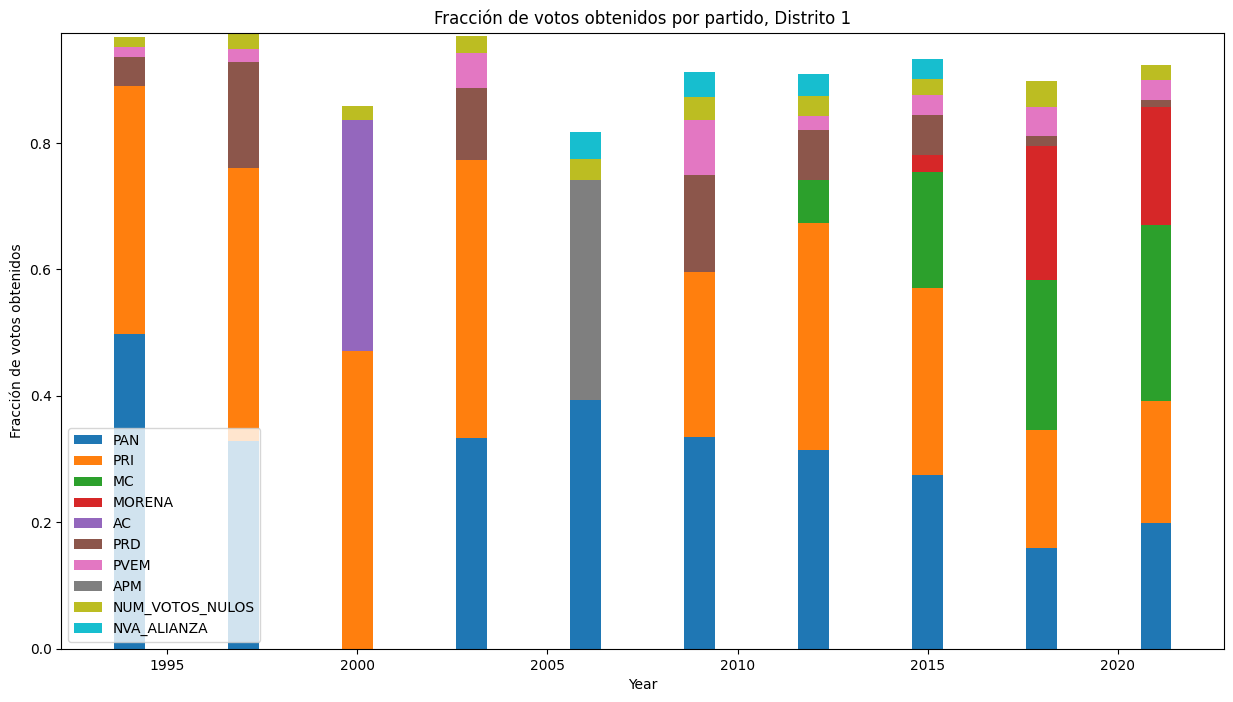

In [44]:
# Se puede implementar una gráfica de barras apiladas para una mejor visualización de los datos

leyendas = []
distrito = 1     # Distrito a analizar
plt.figure(figsize=(15, 8))

bottom = np.zeros(len(tablas_pivote_jalisco_distrito_norm[partido].index))
for partido in top_10_jalisco:
    plt.bar(
        tablas_pivote_jalisco_distrito_norm[partido].index,
        tablas_pivote_jalisco_distrito_norm[partido][distrito],
        bottom = bottom,
        label = partido
    )
    bottom += np.array(tablas_pivote_jalisco_distrito_norm[partido][distrito])
    leyendas.append(partido)

plt.xlabel('Year')
plt.ylabel('Fracción de votos obtenidos')
plt.title(f'Fracción de votos obtenidos por partido, Distrito {str(distrito)}')
plt.legend(leyendas)
plt.show()

In [45]:
tablas_pivote_jalisco_distrito_norm.keys()

dict_keys(['PAN', 'PRI', 'MC', 'MORENA', 'AC', 'PRD', 'PVEM', 'APM', 'NUM_VOTOS_NULOS', 'NVA_ALIANZA'])

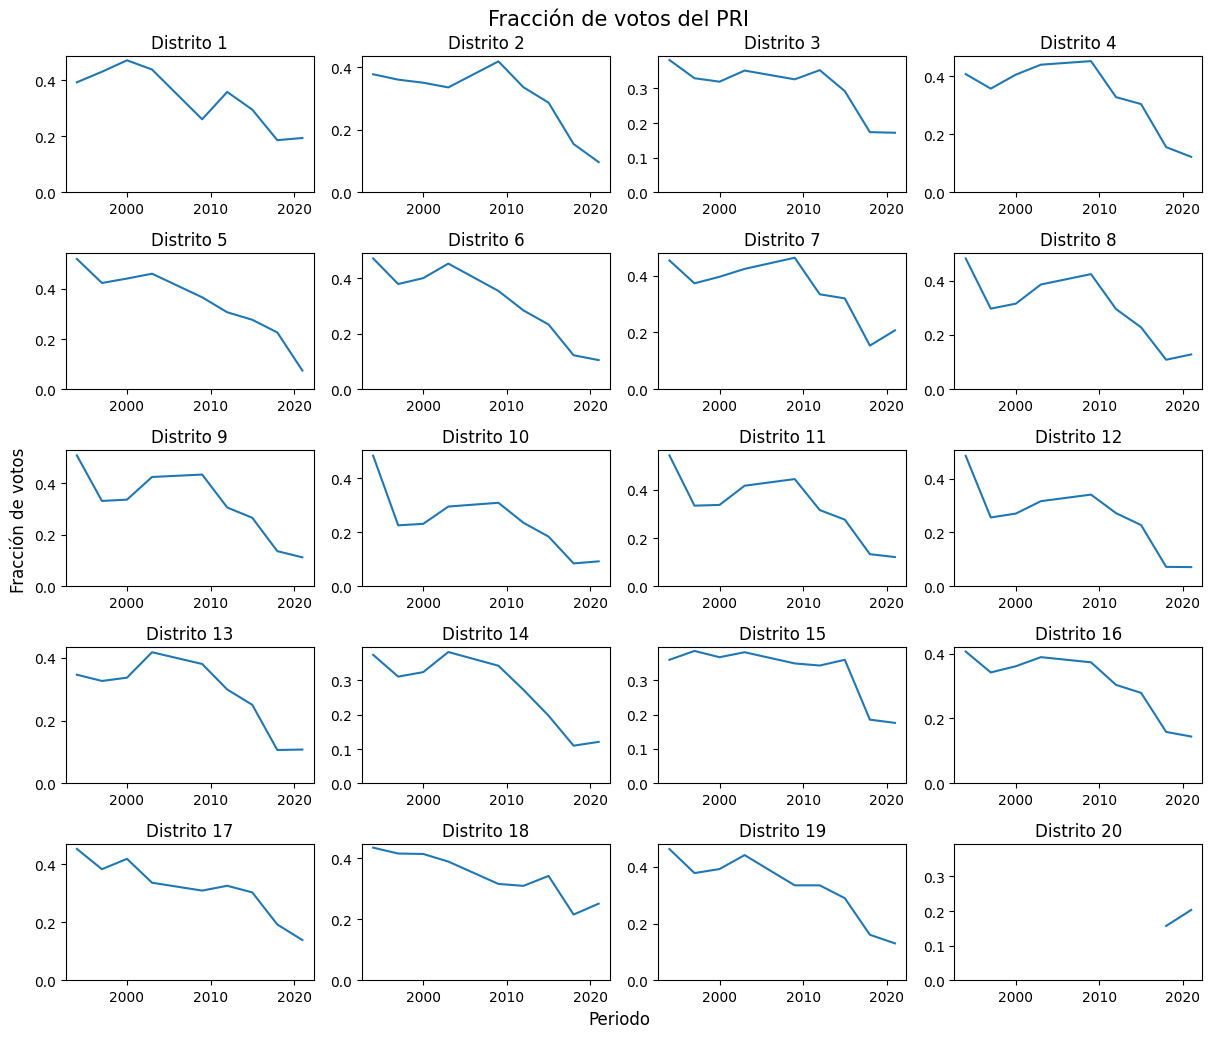

In [46]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'
x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1

        # Grafica los datos en el subgráfico actual
        axs[i, j].plot(x.index, x[distrito], label=f'Gráfica {distrito}')
        axs[i, j].set_title(f'Distrito {distrito}')
        #axs[i, j].legend()
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

ValueError: Input y contains NaN.

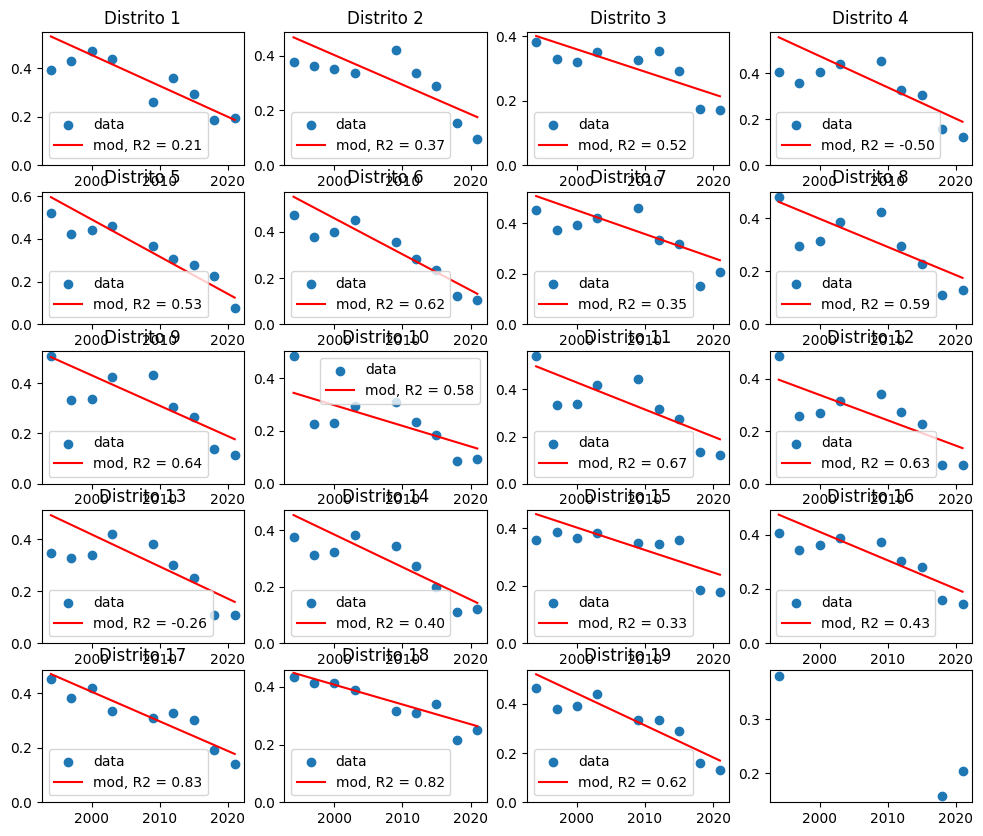

In [48]:
# Configura la disposición de subgráficos 5x4
filas = 5
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
partido = 'PRI'

# Tenemos que filtrar los datos para no considerar los periodos en donde los partidos no participaron
x = tablas_pivote_jalisco_distrito_norm[partido][tablas_pivote_jalisco_distrito_norm[partido].mean(axis = 1) != 0]

# Itera sobre los subgráficos y grafica los datos de ejemplo
for i in range(filas):
    for j in range(columnas):
        # Calcula el índice correspondiente al subgráfico actual
        distrito = i * 4 + j + 1
        y = x[distrito]

        # Grafica los datos en el subgráfico actual
        axs[i, j].scatter(x.index, y, label=f'Gráfica {distrito}')

        # MODELO DE REGRESION LINEAL

        # Dividir el conjunto de datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(x.index.values.reshape(-1, 1), y.values.reshape(-1, 1), test_size = 0.34, random_state=42)

        # Crear el modelo de regresión lineal
        regression_model = LinearRegression()

        # Entrenar el modelo con el conjunto de entrenamiento
        regression_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = regression_model.predict(X_test)

        # Calcular el error cuadrático medio (MSE)
        mse = mean_squared_error(y_test, y_pred)

        # Calcular el coeficiente de determinación (R^2)
        r2 = r2_score(y_test, y_pred)

        x_modelo = np.linspace(x.index.min(), x.index.max(), 100)
        y_modelo = regression_model.coef_ * x_modelo + regression_model.intercept_
        y_modelo = y_modelo.ravel()

        axs[i, j].plot(x_modelo, y_modelo, color='red')

        axs[i, j].set_title(f'Distrito {distrito}')
        axs[i, j].legend(['data', f'mod, R2 = {r2:.2f}'])
        axs[i, j].set_ylim(bottom = 0)

# Nombre de los ejes
fig.text(0.5, 0.0, 'Periodo', ha='center', va='center', fontsize = 12)
fig.text(0.0, 0.5, 'Fracción de votos', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 1.0, f'Fracción de votos del {partido}', ha='center', va='center', fontsize = 15)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra la figura
plt.show()

In [ ]:
print(X_train)

[[2009]
 [1994]
 [2015]
 [2000]
 [2021]
 [2006]
 [2003]
 [2012]]


In [64]:
print(y_train)

[[0.03617042]
 [0.0148816 ]
 [0.02463445]
 [0.02227499]
 [0.02441989]
 [0.03216324]
 [0.02572701]
 [0.03223892]]
